# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
names = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']

df = pd.read_csv(url, names=names, na_values='?')

In [128]:
print(df.shape)
df.head()

(690, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.830,0.000,u,g,w,v,1.250,t,t,1,f,g,202.000,0,+
1,a,58.670,4.460,u,g,q,h,3.040,t,t,6,f,g,43.000,560,+
2,a,24.500,0.500,u,g,q,h,1.500,t,f,0,f,g,280.000,824,+
3,b,27.830,1.540,u,g,w,v,3.750,t,t,5,t,g,100.000,3,+
4,b,20.170,5.625,u,g,w,v,1.710,t,f,0,f,s,120.000,0,+


## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [129]:
#Checking out all unique values across all columns
for col in df.columns:
  print(col)
  print(df[col].unique())
  print('---------------------------------------------')

A1
['b' 'a' nan]
---------------------------------------------
A2
[30.83 58.67 24.5  27.83 20.17 32.08 33.17 22.92 54.42 42.5  22.08 29.92
 38.25 48.08 45.83 36.67 28.25 23.25 21.83 19.17 25.   47.75 27.42 41.17
 15.83 47.   56.58 57.42 42.08 29.25 42.   49.5  36.75 22.58 27.25 23.
 27.75 54.58 34.17 28.92 29.67 39.58 56.42 54.33 41.   31.92 41.5  23.92
 25.75 26.   37.42 34.92 34.25 23.33 23.17 44.33 35.17 43.25 56.75 31.67
 23.42 20.42 26.67 36.   25.5  19.42 32.33 34.83 38.58 44.25 44.83 20.67
 34.08 21.67 21.5  49.58 27.67 39.83   nan 37.17 25.67 34.   49.   62.5
 31.42 52.33 28.75 28.58 22.5  28.5  37.5  35.25 18.67 54.83 40.92 19.75
 29.17 24.58 33.75 25.42 37.75 52.5  57.83 20.75 39.92 24.75 44.17 23.5
 47.67 22.75 34.42 28.42 67.75 47.42 36.25 32.67 48.58 33.58 18.83 26.92
 31.25 56.5  43.   22.33 32.83 40.33 30.5  52.83 46.67 58.33 37.33 23.08
 32.75 68.67 28.   44.   25.08 32.   60.58 40.83 19.33 41.33 56.   49.83
 22.67 27.   26.08 18.42 21.25 57.08 22.42 48.75 40.   40.58 2

In [130]:
df.isna().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [131]:
df.describe()

,A2,A3,A8,A11,A14,A15
count,678.000,690.000,690.000,690.000,677.000,690.000
mean,31.568,4.759,2.223,2.400,184.015,1017.386
std,11.958,4.978,3.347,4.863,173.807,5210.103
min,13.750,0.000,0.000,0.000,0.000,0.000
25%,22.602,1.000,0.165,0.000,75.000,0.000
50%,28.460,2.750,1.000,0.000,160.000,5.000
75%,38.230,7.207,2.625,3.000,276.000,395.500
max,80.250,28.000,28.500,67.000,2000.000,100000.000


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1     678 non-null object
A2     678 non-null float64
A3     690 non-null float64
A4     684 non-null object
A5     684 non-null object
A6     681 non-null object
A7     681 non-null object
A8     690 non-null float64
A9     690 non-null object
A10    690 non-null object
A11    690 non-null int64
A12    690 non-null object
A13    690 non-null object
A14    677 non-null float64
A15    690 non-null int64
A16    690 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 86.3+ KB


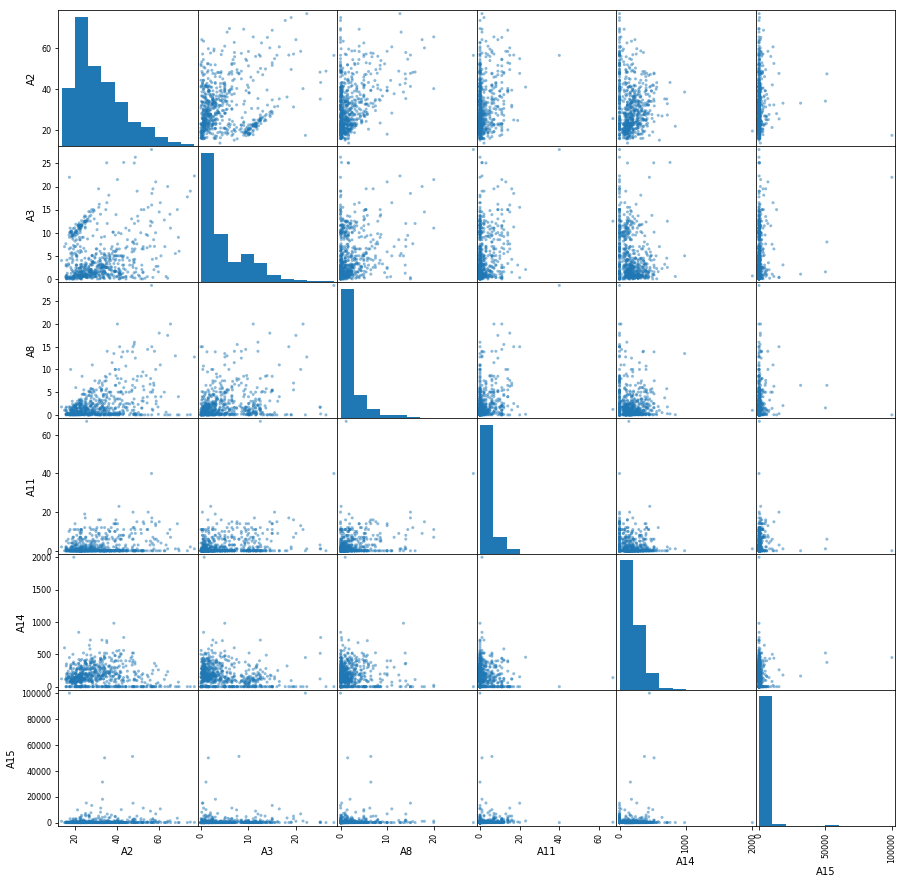

In [133]:
#pairplot to see distobutions
pd.plotting.scatter_matrix(df.dropna(), figsize=(15,15));

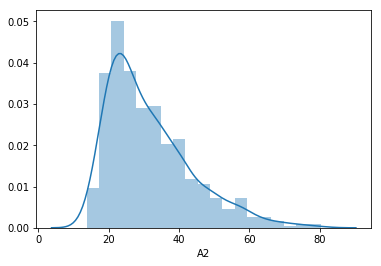

In [134]:
sns.distplot(df['A2'].dropna())

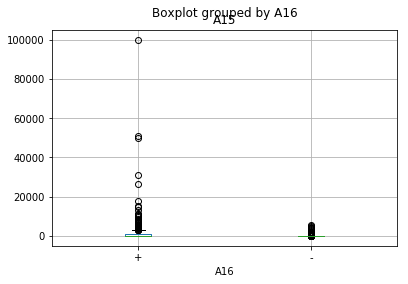

In [135]:
df.boxplot(column='A15', by='A16')

In [0]:
#replacing some strings with ints
map1 = {'a': 0, 'b': 1}
map16 = {'-': 0, '+' : 1}
df['A1'] = df['A1'].replace(map1)
df['A16'] = df['A16'].replace(map16)

In [0]:
map4 = {'u': 0, 'y': 1, 'l': 2}
map9_12 = {'t': 0, 'f' : 1}
map13 = {'g': 0, 's': 1, 'p': 2}

df['A4'] = df['A4'].replace(map4)
df['A9'] = df['A9'].replace(map9_12)
df['A10'] = df['A10'].replace(map9_12)
df['A12'] = df['A12'].replace(map9_12)
df['A13'] = df['A13'].replace(map13)

In [138]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1.000,30.830,0.000,0.000,g,w,v,1.250,0,0,1,1,0,202.000,0,1
1,0.000,58.670,4.460,0.000,g,q,h,3.040,0,0,6,1,0,43.000,560,1
2,0.000,24.500,0.500,0.000,g,q,h,1.500,0,1,0,1,0,280.000,824,1
3,1.000,27.830,1.540,0.000,g,w,v,3.750,0,0,5,0,0,100.000,3,1
4,1.000,20.170,5.625,0.000,g,w,v,1.710,0,1,0,1,1,120.000,0,1


In [0]:
#splitting dataframe by the class variable
approved = df[df['A16'] == 1]
not_approved = df[df['A16'] == 0]

In [140]:
print(approved.shape)
approved.head()

(307, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1.000,30.830,0.000,0.000,g,w,v,1.250,0,0,1,1,0,202.000,0,1
1,0.000,58.670,4.460,0.000,g,q,h,3.040,0,0,6,1,0,43.000,560,1
2,0.000,24.500,0.500,0.000,g,q,h,1.500,0,1,0,1,0,280.000,824,1
3,1.000,27.830,1.540,0.000,g,w,v,3.750,0,0,5,0,0,100.000,3,1
4,1.000,20.170,5.625,0.000,g,w,v,1.710,0,1,0,1,1,120.000,0,1


In [141]:
print(not_approved.shape)
not_approved.head()

(383, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
70,1.000,32.330,7.500,0.000,g,e,bb,1.585,0,1,0,0,1,420.000,0,0
71,1.000,34.830,4.000,0.000,g,d,bb,12.500,0,1,0,0,0,nan,0,0
72,0.000,38.580,5.000,0.000,g,cc,v,13.500,0,1,0,0,0,980.000,0,0
73,1.000,44.250,0.500,0.000,g,m,v,10.750,0,1,0,1,1,400.000,0,0
74,1.000,44.830,7.000,1.000,p,c,v,1.625,1,1,0,1,0,160.000,2,0


In [142]:
approved.describe()

,A1,A2,A3,A4,A8,A9,A10,A11,A12,A13,A14,A15,A16
count,304.000,305.000,307.000,303.000,307.000,307.000,307.000,307.000,307.000,307.000,301.000,307.000,307.000
mean,0.678,33.720,5.905,0.162,3.428,0.075,0.319,4.606,0.524,0.081,164.422,2038.860,1.000
std,0.468,12.810,5.471,0.386,4.121,0.264,0.467,6.320,0.500,0.328,161.771,7659.764,0.000
min,0.000,13.750,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
25%,0.000,23.170,1.500,0.000,0.750,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
50%,1.000,30.500,4.460,0.000,2.000,0.000,0.000,3.000,1.000,0.000,120.000,221.000,1.000
75%,1.000,41.330,9.520,0.000,5.000,0.000,1.000,7.000,1.000,0.000,280.000,1209.000,1.000
max,1.000,76.750,28.000,2.000,28.500,1.000,1.000,67.000,1.000,2.000,840.000,100000.000,1.000


In [143]:
not_approved.describe()

,A1,A2,A3,A4,A8,A9,A10,A11,A12,A13,A14,A15,A16
count,374.000,373.000,383.000,381.000,383.000,383.000,383.000,383.000,383.000,383.000,376.000,383.000,383.000
mean,0.701,29.808,3.840,0.310,1.258,0.799,0.775,0.632,0.556,0.125,199.699,198.606,0.000
std,0.459,10.919,4.338,0.463,2.120,0.401,0.418,1.900,0.497,0.354,181.565,671.609,0.000
min,0.000,15.170,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,22.000,0.835,0.000,0.125,1.000,1.000,0.000,0.000,0.000,100.000,0.000,0.000
50%,1.000,27.330,2.210,0.000,0.415,1.000,1.000,0.000,1.000,0.000,167.500,1.000,0.000
75%,1.000,34.830,5.000,1.000,1.500,1.000,1.000,0.000,1.000,0.000,272.000,67.000,0.000
max,1.000,80.250,26.335,1.000,13.875,1.000,1.000,20.000,1.000,2.000,2000.000,5552.000,0.000


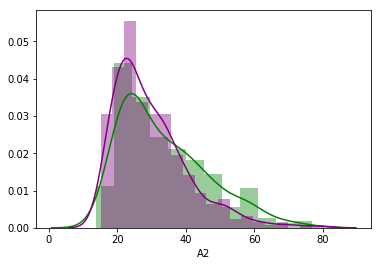

In [144]:
sns.distplot(approved['A2'].dropna(), color='g')
sns.distplot(not_approved['A2'].dropna(), color='purple');

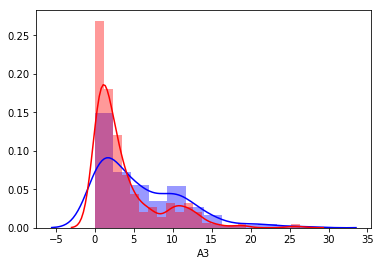

In [145]:
sns.distplot(approved['A3'].dropna(), color='b')
sns.distplot(not_approved['A3'].dropna(), color='r');

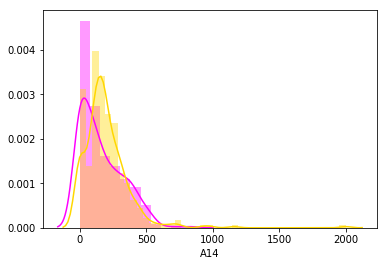

In [146]:
sns.distplot(approved['A14'].dropna(), color='magenta')
sns.distplot(not_approved['A14'].dropna(), color='gold');

In [147]:
stats.ttest_ind(approved['A2'], not_approved['A2'], nan_policy='omit')

Ttest_indResult(statistic=4.2922156166315535, pvalue=2.0276637071781407e-05)

## T Tests

### The null hypothesis on these featurs that there are no differences between the means of the two class labels.
### The alt hypothesis is that THERE IS A DIFFERENCE between the means of both class labels


In [0]:
#function to run 2 sample t tests against both class variables
def ttest(approved, not_approved):
  cols = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']
  for col in cols:
    print('Column ' + col + ' T Statistic and P value')
    print('Approved Mean ' + str(approved[col].mean()))
    print('NOT Approved Mean ' + str(not_approved[col].mean()))
    tstat, pval = stats.ttest_ind(approved[col], not_approved[col], nan_policy='omit')
    print('T Stat ' + str(tstat))
    print('P Value ' + str(pval))
    print('---------------------------------------------')
  

In [149]:
ttest(approved, not_approved)

Column A2 T Statistic and P value
Approved Mean 33.7204918032787
NOT Approved Mean 29.80823056300268
T Stat 4.2922156166315535
P Value 2.0276637071781407e-05
---------------------------------------------
Column A3 T Statistic and P value
Approved Mean 5.904951140065144
NOT Approved Mean 3.839947780678851
T Stat 5.52998337614816
P Value 4.551680702308068e-08
---------------------------------------------
Column A8 T Statistic and P value
Approved Mean 3.427899022801302
NOT Approved Mean 1.2579242819843346
T Stat 8.935819983773698
P Value 3.6710537401601785e-18
---------------------------------------------
Column A11 T Statistic and P value
Approved Mean 4.605863192182411
NOT Approved Mean 0.6318537859007833
T Stat 11.667004222431277
P Value 7.957718568079967e-29
---------------------------------------------
Column A14 T Statistic and P value
Approved Mean 164.421926910299
NOT Approved Mean 199.6994680851064
T Stat -2.6358251986645476
P Value 0.008586135473979569
-------------------------

### Every value has a P Value smaller than 0.05 (p < 0.05), thus we can *REJECT* the null hypothesis for this data

## Chi Squared

In [150]:
#A16 -- 1= +    0= -

print(pd.crosstab(df['A16'], df['A4'], normalize='columns'))

A4   0.000  1.000  2.000
A16                     
0    0.507  0.724  0.000
1    0.493  0.276  1.000


In [0]:
#function to do a simplke crosstab of all catigorical columns against the class variable
def crosstabs(df):
  cols = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']
  for col in cols:
    print(pd.crosstab(df['A16'], df[col], normalize='columns'))
    print('------------------------------------------')

In [152]:
crosstabs(df)

A1   0.000  1.000
A16              
0    0.533  0.560
1    0.467  0.440
------------------------------------------
A4   0.000  1.000  2.000
A16                     
0    0.507  0.724  0.000
1    0.493  0.276  1.000
------------------------------------------
A5      g    gg     p
A16                  
0   0.507 0.000 0.724
1   0.493 1.000 0.276
------------------------------------------
A6     aa     c    cc     d     e    ff  ...     k     m     q     r     w     x
A16                                      ...                                    
0   0.648 0.547 0.293 0.767 0.440 0.868  ... 0.725 0.579 0.346 0.333 0.484 0.158
1   0.352 0.453 0.707 0.233 0.560 0.132  ... 0.275 0.421 0.654 0.667 0.516 0.842

[2 rows x 14 columns]
------------------------------------------
A7     bb    dd    ff     h     j     n     o     v     z
A16                                                      
0   0.576 0.667 0.860 0.370 0.625 0.500 0.500 0.576 0.250
1   0.424 0.333 0.140 0.630 0.375 0.500 0.500 0

In [0]:
#fuction to run chi2 test on all columns against the class variable
def chi_tests(df):
  cols = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']
  for col in cols:
    chi2, pval, dof, expt = stats.chi2_contingency(pd.crosstab(df['A16'], df[col]))
    print(col)
    print('Chi Squared: {}'.format(chi2))
    print('P Value: {}'.format(pval))
    print('Degrees of Freedom: {}'.format(dof))
    print('Expected: {}'.format(expt))
    print('-------------------------------------------------')

In [154]:
chi_tests(df)

A1
Chi Squared: 0.3112832649161994
P Value: 0.5768937883001118
Degrees of Freedom: 1
Expected: [[115.84070796 258.15929204]
 [ 94.15929204 209.84070796]]
-------------------------------------------------
A4
Chi Squared: 26.234074966202144
P Value: 2.010680204180363e-06
Degrees of Freedom: 2
Expected: [[289.09210526  90.79385965   1.11403509]
 [229.90789474  72.20614035   0.88596491]]
-------------------------------------------------
A5
Chi Squared: 26.234074966202144
P Value: 2.010680204180363e-06
Degrees of Freedom: 2
Expected: [[289.09210526   1.11403509  90.79385965]
 [229.90789474   0.88596491  72.20614035]]
-------------------------------------------------
A6
Chi Squared: 98.32520342679135
P Value: 3.4999300402715717e-15
Degrees of Freedom: 13
Expected: [[29.97356828 76.04405286 22.75770925 16.65198238 13.87665198 29.4185022
  32.74889868  5.55066079 28.30837004 21.09251101 43.29515419  1.66519824
  35.52422907 21.09251101]
 [24.02643172 60.95594714 18.24229075 13.34801762 11.1233

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

#### 1) Not for just 2, but for all t-tests on all of the concontinuous features, the mean of the features for the approved (+) class label were always higher. Sometimes only slightly, and other times the difference was very large. In all cases the null hypotheses, stating that there is no difference between both class label means, is rejected using the 2 sample t-test. The feature that had the most difference between the 2 samples is A15. Overall the means of the approved class are higher than the means of the not approved class, exept for the column A14, which was the exeption(p value is still lower than 0.05).

#### 2) Most features in the Chi^2 tests resulted in the null hypothesis for those features be Rejected. There is an exeption with Column 12, and column 1. In both of those columns, we *FAIL TO REJECT* the null hypothesis. It seems that 1, and 12 do not have a relationship with the class variable, and all of the other catigorical variables do. Column A13 also *came close* to having its null hypothesis fail to be rejected. 


#### Over all is seems to make sense that this data is split based on the class labels of either being approved or not. It is very likely that the data in those features is what contributed to the decisision to either approve or deny credit to someone. But there are also a handful of features that do not seem to have an infulence.  

#### 3) This was a difficult sprint for me. I feel like statistics is a large subject to to cover in such a short time. I also feel like I might have missed doing something, as I did not create as many plots as I though I would have, and the ammount of coding I actally did seems kind of small. The hardest part for me is probably interpretation of the results. 